# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Numerical exercises 1

## - <span style="color:blue"> First:</span> compile and run the c++ codes in the folder exercises_01 (remember to read the file READ_ME first)
## - <span style="color:blue"> Second:</span> run the following cells in order to do the data analysis

### Exercise 01.1 
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['text.usetex'] = True

M=100000
N=100
L=int(M/N)
x = np.arange(N)
x*=L
sum_prog,err_prog = np.loadtxt("datir.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
plt.ylabel(r"$<r>-0.5$")
plt.xlabel("throwns")

plt.show()

<Figure size 640x480 with 1 Axes>

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

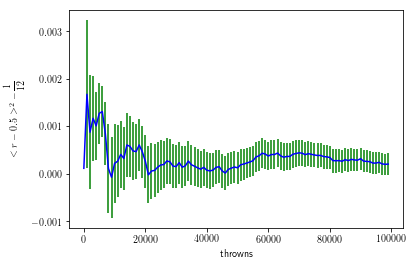

In [2]:
# Continue using variables and functions of the previous code cell
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
    
sum_prog,err_prog = np.loadtxt("datisigma.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog, color ='b' , ecolor='g')
plt.ylabel(r'$< r-0.5 > ^2 - \displaystyle\frac{1}{12} $')
plt.xlabel("throwns") 

plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

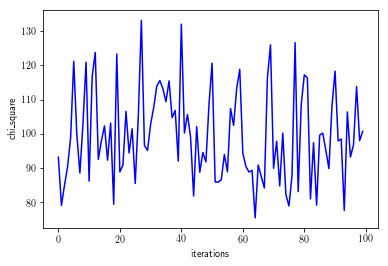

In [3]:
z = np.arange(100)
chi = np.loadtxt("chiquadro.txt",unpack='true')
plt.plot(z,chi,color='b')
plt.ylabel("chi\_square")
plt.xlabel("iterations")

plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

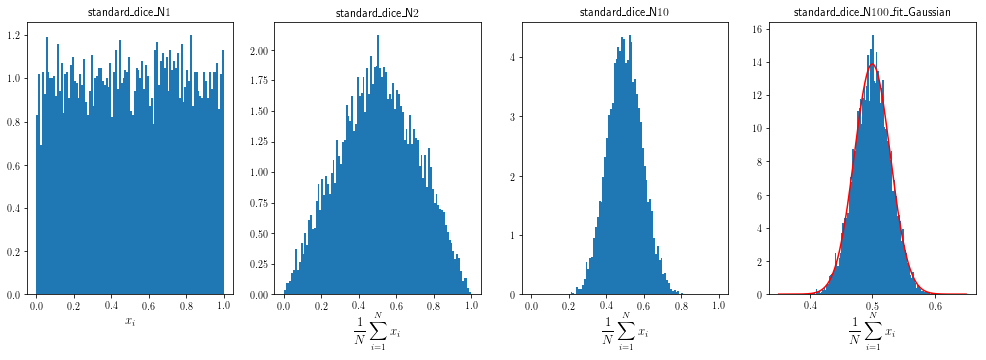

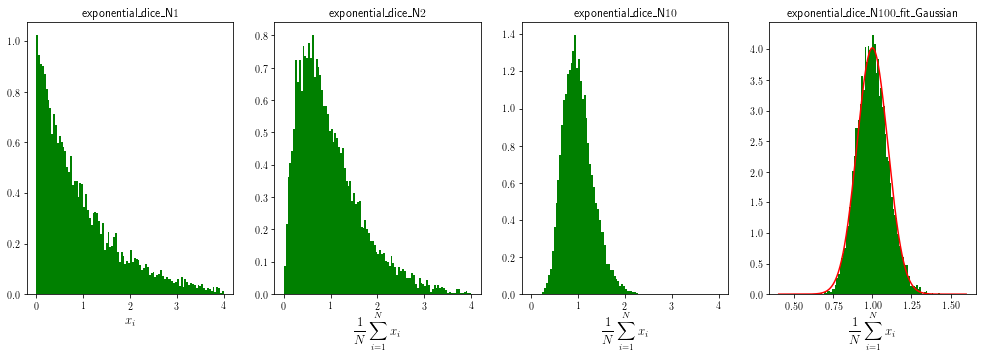

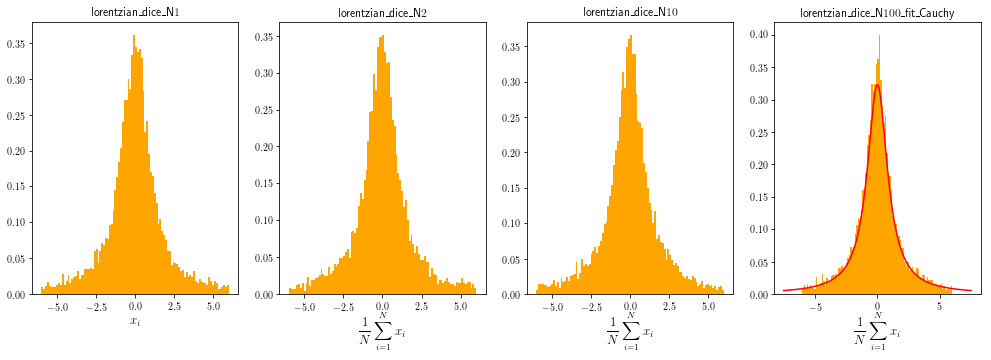

In [8]:
from scipy import stats

n_bins=100
N=r'$1$',r'$2$',r'$10$',r'$100$'

fig,axs = plt.subplots(nrows=1,ncols=4,figsize=(17, 5))
for i in range(4):
    y = np.loadtxt("hist_stand.txt",usecols=(i),unpack='true')
    if(i!=0):
        axs[i].set_xlabel(r'$\displaystyle\frac{1}{N}\sum_{i=1}^{N} x_i$',fontsize=13, color='black')
    else:
        axs[i].set_xlabel('$x_i$',fontsize=13, color='black')
    if(i!=3):
        axs[i].hist(y, n_bins,density=True, range=(0.,1))
        axs[i].set_title('standard\_dice\_N'+N[i])
    else:
        axs[i].hist(y, n_bins ,density=True, range=(0.4,0.6) )
        axs[i].set_title(r'standard\_dice\_N'+N[i]+"\_fit\_Gaussian")
        xt=plt.xticks()[0]
        xmin,xmax = min(xt),max(xt)
        lnspc = np.linspace(xmin,xmax,len(y))
        m, s = stats.norm.fit(y)
        pdf_g = stats.norm.pdf(lnspc,m,s)
        axs[i].plot(lnspc,pdf_g,label='Gauss_stand',color='red')

fig1,axs1 = plt.subplots(nrows=1,ncols=4,figsize=(17, 5))
for i in range(4):
    y = np.loadtxt("hist_exp.txt",usecols=(i),unpack='true')
    if(i!=0):
        axs1[i].set_xlabel(r'$\displaystyle\frac{1}{N}\sum_{i=1}^{N} x_i$',fontsize=13, color='black')
    else:
        axs1[i].set_xlabel(r'$x_i$',fontsize=13, color='black')
    if(i!=3):
        axs1[i].hist(y, n_bins, density=True,facecolor='g', range=(0.,4.))
        axs1[i].set_title(r'exponential\_dice\_N'+N[i])
    else:
        axs1[i].hist(y, n_bins , density=True,facecolor='g', range=(0.5,1.5) )
        axs1[i].set_title(r'exponential\_dice\_N'+N[i]+'\_fit\_Gaussian')
        xt=plt.xticks()[0]
        xmin,xmax = min(xt),max(xt)
        lnspc = np.linspace(xmin,xmax,len(y))
        m, s = stats.norm.fit(y)
        pdf_g = stats.norm.pdf(lnspc,m,s)
        axs1[i].plot(lnspc,pdf_g,label='Gauss_exp',color='red')

fig2,axs2 = plt.subplots(nrows=1,ncols=4,figsize=(17, 5))
for i in range(4):
    y = np.loadtxt("hist_lor.txt",usecols=(i),unpack='true')
    if(i!=0):
        axs2[i].set_xlabel(r'$\displaystyle\frac{1}{N}\sum_{i=1}^{N} x_i$',fontsize=13, color='black')
    else:
        axs2[i].set_xlabel(r'$x_i$',fontsize=13, color='black')
    axs2[i].hist(y, n_bins ,density=True,facecolor='orange', range=(-6.,6.) )
    if(i!=3):
        axs2[i].set_title(r'lorentzian\_dice\_N'+N[i])
    else:
        axs2[i].set_title(r'lorentzian\_dice\_N'+N[i]+'\_fit\_Cauchy')
        xt=plt.xticks()[0]
        xmin,xmax = min(xt),max(xt)
        lnspc = np.linspace(xmin,xmax,len(y))
        m, s = stats.cauchy.fit(y)
        pdf_g = stats.cauchy.pdf(lnspc,m,s)
        axs2[i].plot(lnspc,pdf_g,label='Cauchy',color='red')

plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

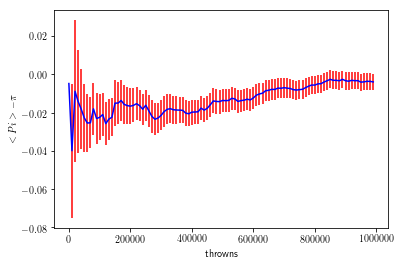

In [6]:
M=1000000
N=100
L=int(M/N)
x = np.arange(N)
x*=L
sum_prog,err_prog = np.loadtxt("datipi.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
plt.ylabel(r"$<Pi>-\pi$")
plt.xlabel("throwns")

plt.show()

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

- <font color="blue">answer</font> : you cannot choose N equal to 1, because you have not uncertainty, because it corresponds to have just one measure.
- you can also thinks to use N=M, but in this case all the points have to be taken into account and it is in disagreement with our use data blocking of numerical sampling.
- it's not possible to choose N bigger than M, it doesn't have any sense. 
- if we want to use the data blocking method we need that the points present in one block are uncorreleted with the points in all the others blocks. So it's important to choose N keeping in mind this hypothesis. 